c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


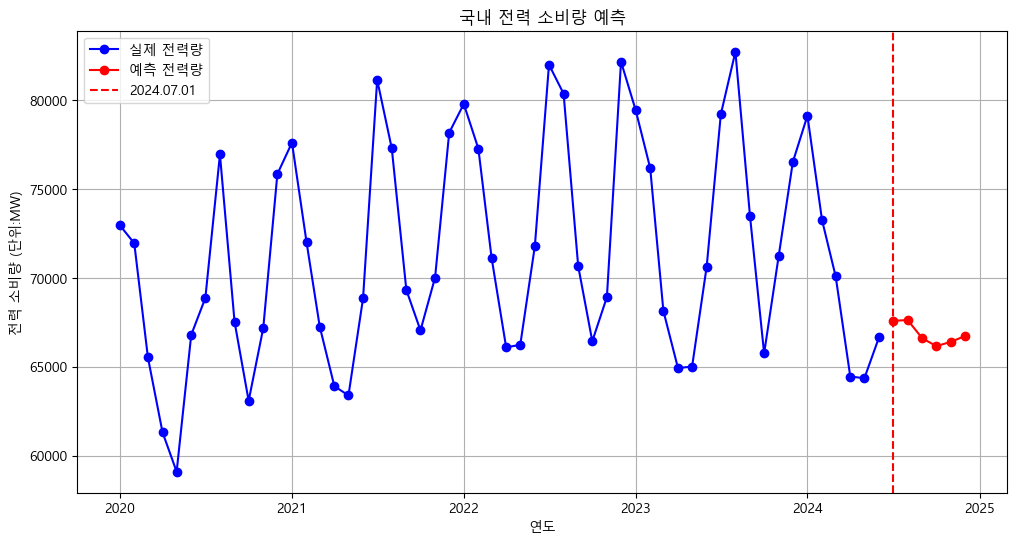

In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 글꼴 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 로드
file_path = 'C:/Users/power.csv'
power_data = pd.read_csv(file_path, encoding='CP949')

# 컬럼 이름 변경
power_data.columns = ['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 데이터를 긴 형식으로 변환
power_data_long = power_data.melt(id_vars=['Year'], 
                                  value_vars=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                                  var_name='Month', 
                                  value_name='Consumption')

# datetime 컬럼 생성
power_data_long['Date'] = pd.to_datetime(power_data_long['Year'].astype(str) + power_data_long['Month'], format='%Y%b')

# Date로 정렬
power_data_long = power_data_long.sort_values('Date').reset_index(drop=True)

# ARIMA 모델에 사용할 데이터 준비
# 2024년 6월까지의 데이터를 훈련 데이터로 사용
train_data = power_data_long[power_data_long['Date'] <= '2024-06-01'].set_index('Date')['Consumption']

# ARIMA 모델 적합
model = ARIMA(train_data, order=(5, 1, 0))  # 기본 (p,d,q) 순서를 사용, 추가 조정 가능
model_fit = model.fit()

# 향후 6개월 (2024년 7월 ~ 2024년 12월) 예측
forecast = model_fit.forecast(steps=6)
forecast_dates = pd.date_range(start='2024-07-01', end='2024-12-01', freq='MS')

# 예측 값을 시리즈로 변환
forecast_series = pd.Series(forecast, index=forecast_dates)

# 기존 데이터와 예측 데이터 결합
combined_series = pd.concat([train_data, forecast_series])

# 결과를 플로팅
plt.figure(figsize=(12, 6))
plt.plot(combined_series[:'2024-06-01'], label='실제 전력량', marker='o', color='blue')
plt.plot(combined_series['2024-07-01':], label='예측 전력량', marker='o', color='red')
plt.axvline(x=pd.Timestamp('2024-07-01'), color='r', linestyle='--', label='2024.07.01')
plt.title('국내 전력 소비량 예측')
plt.xlabel('연도')
plt.ylabel('전력 소비량 (단위:MW)')
plt.legend()
plt.grid(True)
plt.show()
